# Collecte des données

Récupération des données historiques du S&P 500

In [ ]:
!pip install yfinance

import yfinance as yf
from datetime import datetime, timedelta

# Define the ticker symbol for S&P 500
ticker = "^GSPC"

# Define the date range
# For example, let's get data for the last 5 years:
end_date = datetime.now()
start_date = end_date - timedelta(days=5*365)

# Download the data using yfinance
data = yf.download(ticker, start=start_date, end=end_date)

# Save the data to a CSV file (optional)
data.to_csv('sp500_data.csv')

print("S&P 500 data downloaded and saved to sp500_data.csv")

[*********************100%***********************]  1 of 1 completed

S&P 500 data downloaded and saved to sp500_data.csv


Ajout de variables exogènes

In [ ]:
!pip install gdown
import gdown
import pandas as pd

# Identifiant du fichier
CPIAUCSL = '1SLbDAXRn8LF3PDqVAoEmREhVorUjAqlr'
GDPC1 = '1ow3kUVMJ65laiqnKYp8Vw0fIrZeIJ9TF'

# Construire l'URL de téléchargement
url1 = f"https://drive.google.com/uc?id={CPIAUCSL}"
url2 = f"https://drive.google.com/uc?id={GDPC1}"

# Télécharger le fichier CSV
output1 = 'CPIAUCSL.csv'
output2 = 'GDPC1.csv'
gdown.download(url1, output1, quiet=False)
gdown.download(url2, output2, quiet=False)

# Charger le fichier CSV dans un DataFrame
data1 = pd.read_csv(output1, sep=',')
data2 = pd.read_csv(output2, sep=',')

# Afficher les premières lignes
#print(data1.head())
print(data2.head())

# Identifiant du fichier
CPIAUCSL = '1SLbDAXRn8LF3PDqVAoEmREhVorUjAqlr'
GDPC1 = '1ow3kUVMJ65laiqnKYp8Vw0fIrZeIJ9TF'

# Construire l'URL de téléchargement
url1 = f"https://drive.google.com/uc?id={CPIAUCSL}"
url2 = f"https://drive.google.com/uc?id={GDPC1}"

# Télécharger le fichier CSV
output1 = 'CPIAUCSL.csv'
output2 = 'GDPC1.csv'
gdown.download(url1, output1, quiet=False)
gdown.download(url2, output2, quiet=False)

# Charger le fichier CSV dans un DataFrame
data1 = pd.read_csv(output1, sep =',')
data2 = pd.read_csv(output2, sep =',')

# Afficher les premières lignes
#print(data1.head())
print(data2.head())


Downloading...
From: https://drive.google.com/uc?id=1SLbDAXRn8LF3PDqVAoEmREhVorUjAqlr
To: /content/CPIAUCSL.csv
100%|██████████| 16.2k/16.2k [00:00<00:00, 7.65MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ow3kUVMJ65laiqnKYp8Vw0fIrZeIJ9TF
To: /content/GDPC1.csv
100%|██████████| 6.33k/6.33k [00:00<00:00, 14.1MB/s]


         DATE     GDPC1
0  1947-01-01  2182.681
1  1947-04-01  2176.892
2  1947-07-01  2172.432
3  1947-10-01  2206.452
4  1948-01-01  2239.682


Downloading...
From: https://drive.google.com/uc?id=1SLbDAXRn8LF3PDqVAoEmREhVorUjAqlr
To: /content/CPIAUCSL.csv
100%|██████████| 16.2k/16.2k [00:00<00:00, 29.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ow3kUVMJ65laiqnKYp8Vw0fIrZeIJ9TF
To: /content/GDPC1.csv
100%|██████████| 6.33k/6.33k [00:00<00:00, 14.7MB/s]

         DATE     GDPC1
0  1947-01-01  2182.681
1  1947-04-01  2176.892
2  1947-07-01  2172.432
3  1947-10-01  2206.452
4  1948-01-01  2239.682


In [ ]:
# Charger les données du PIB (trimestriel)
gdp = pd.read_csv("GDPC1.csv", parse_dates=['DATE'])

# Charger les données de l'inflation (mensuel)
cpi = pd.read_csv("CPIAUCSL.csv", parse_dates=['DATE'])


In [ ]:
# Aligner le PIB (trimestriel) sur les dates quotidiennes
gdp_daily = gdp.set_index('DATE').resample('D').ffill().reset_index()

# Aligner l'inflation (mensuel) sur les dates quotidiennes
cpi_daily = cpi.set_index('DATE').resample('D').ffill().reset_index()


In [ ]:
# Flatten the MultiIndex columns in 'data' before merging
data.columns = ['_'.join(col).strip() for col in data.columns.values]

# Fusionner S&P 500 avec PIB (trimestriel)
# Reset the index of 'data' to a single level before merging
merged_data = pd.merge(data.reset_index(), gdp_daily, left_on='Date', right_on='DATE', how='left')

# Fusionner avec l'inflation (mensuel)
merged_data = pd.merge(merged_data, cpi_daily, left_on='Date', right_on='DATE', how='left')

# Renommer les colonnes pour plus de clarté
merged_data.rename(columns={"GDPC1": "PIB", "CPIAUCSL": "Inflation"}, inplace=True)


In [ ]:
# Remplir les valeurs manquantes
merged_data.fillna(method='ffill', inplace=True)

# Vérifier les données finales
print(merged_data.head(50))


         Date  Adj Close_^GSPC  Close_^GSPC   High_^GSPC    Low_^GSPC  \
0  2019-12-23      3224.010010  3224.010010  3227.780029  3222.300049   
1  2019-12-24      3223.379883  3223.379883  3226.429932  3220.510010   
2  2019-12-26      3239.909912  3239.909912  3240.080078  3227.199951   
3  2019-12-27      3240.020020  3240.020020  3247.929932  3234.370117   
4  2019-12-30      3221.290039  3221.290039  3240.919922  3216.570068   
5  2019-12-31      3230.780029  3230.780029  3231.719971  3212.030029   
6  2020-01-02      3257.850098  3257.850098  3258.139893  3235.530029   
7  2020-01-03      3234.850098  3234.850098  3246.149902  3222.340088   
8  2020-01-06      3246.280029  3246.280029  3246.840088  3214.639893   
9  2020-01-07      3237.179932  3237.179932  3244.909912  3232.429932   
10 2020-01-08      3253.050049  3253.050049  3267.070068  3236.669922   
11 2020-01-09      3274.699951  3274.699951  3275.580078  3263.669922   
12 2020-01-10      3265.350098  3265.350098  3282.9

<ipython-input-9-2ba428e6d73d>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_data.fillna(method='ffill', inplace=True)


In [ ]:
# Sauvegarder les données fusionnées
merged_data.to_csv("sp500_with_gdp_and_inflation.csv", index=False)

print("Fichier fusionné sauvegardé sous sp500_with_gdp_and_inflation.csv")


Fichier fusionné sauvegardé sous sp500_with_gdp_and_inflation.csv


In [ ]:
merged_data

,Date,Adj Close_^GSPC,Close_^GSPC,High_^GSPC,Low_^GSPC,Open_^GSPC,Volume_^GSPC,DATE_x,PIB,DATE_y,Inflation
0,2019-12-23,3224.010010,3224.010010,3227.780029,3222.300049,3226.050049,3064530000,2019-12-23,20985.448,2019-12-23,258.630
1,2019-12-24,3223.379883,3223.379883,3226.429932,3220.510010,3225.449951,1296530000,2019-12-24,20985.448,2019-12-24,258.630
2,2019-12-26,3239.909912,3239.909912,3240.080078,3227.199951,3227.199951,2164540000,2019-12-26,20985.448,2019-12-26,258.630
3,2019-12-27,3240.020020,3240.020020,3247.929932,3234.370117,3247.229980,2429150000,2019-12-27,20985.448,2019-12-27,258.630
4,2019-12-30,3221.290039,3221.290039,3240.919922,3216.570068,3240.090088,3021720000,2019-12-30,20985.448,2019-12-30,258.630
...,...,...,...,...,...,...,...,...,...,...,...
1251,2024-12-12,6051.250000,6051.250000,6079.680176,6051.250000,6074.290039,3678010000,2024-07-01,23386.733,2024-10-01,315.454
1252,2024-12-13,6051.089844,6051.089844,6078.580078,6035.770020,6068.169922,3584960000,2024-07-01,23386.733,2024-10-01,315.454
1253,2024-12-16,6074.080078,6074.080078,6085.189941,6059.140137,6063.790039,4391100000,2024-07-01,23386.733,2024-10-01,315.454
1254,2024-12-17,6050.609863,6050.609863,6057.680176,6035.189941,6052.549805,4544500000,2024-07-01,23386.733,2024-10-01,315.454


# Pré-traitement des données

Transformation des prix en rendements log

In [ ]:
import numpy as np

# Convertir la colonne 'Date' en datetime (optionnel, pour les séries temporelles)
merged_data['Date'] = pd.to_datetime(merged_data['Date'])

# Calculer les rendements logarithmiques
merged_data['Log Returns'] = np.log(merged_data['Adj Close_^GSPC'] / merged_data['Adj Close_^GSPC'].shift(1))

# Afficher le DataFrame
print(merged_data)

           Date  Adj Close_^GSPC  Close_^GSPC   High_^GSPC    Low_^GSPC  \
0    2019-12-23      3224.010010  3224.010010  3227.780029  3222.300049   
1    2019-12-24      3223.379883  3223.379883  3226.429932  3220.510010   
2    2019-12-26      3239.909912  3239.909912  3240.080078  3227.199951   
3    2019-12-27      3240.020020  3240.020020  3247.929932  3234.370117   
4    2019-12-30      3221.290039  3221.290039  3240.919922  3216.570068   
...         ...              ...          ...          ...          ...   
1251 2024-12-12      6051.250000  6051.250000  6079.680176  6051.250000   
1252 2024-12-13      6051.089844  6051.089844  6078.580078  6035.770020   
1253 2024-12-16      6074.080078  6074.080078  6085.189941  6059.140137   
1254 2024-12-17      6050.609863  6050.609863  6057.680176  6035.189941   
1255 2024-12-18      5872.160156  5872.160156  6070.669922  5867.790039   

       Open_^GSPC  Volume_^GSPC     DATE_x        PIB     DATE_y  Inflation  \
0     3226.050049   

Analyse de stationnarité (test ADF)

In [ ]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# Test ADF sur la colonne "Log Returns"
result = adfuller(merged_data['Log Returns'].dropna())

# Affichage des résultats
print("Statistique ADF :", result[0])
print("p-value :", result[1])
print("Nombre de décalages utilisés :", result[2])
print("Nombre d'observations :", result[3])
print("Valeurs critiques :", result[4])


Statistique ADF : -10.573878792398489
p-value : 7.188454569404437e-19
Nombre de décalages utilisés : 8
Nombre d'observations : 1246
Valeurs critiques : {'1%': -3.4356090875394525, '5%': -2.863862410805964, '10%': -2.568006480268158}


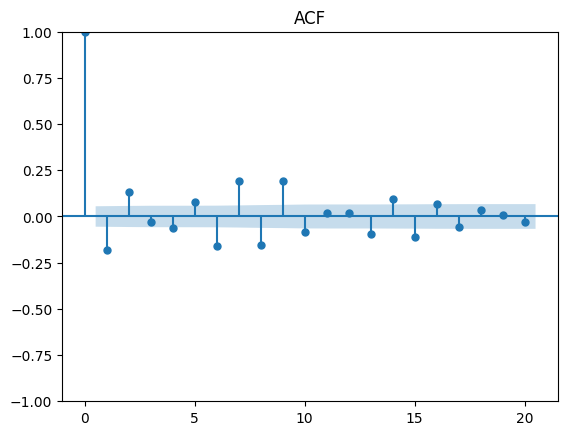

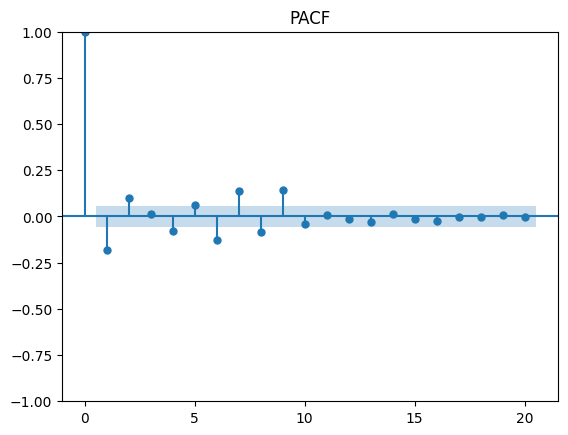

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Tracer l'ACF
plot_acf(merged_data['Log Returns'].dropna(), lags=20)
plt.title('ACF')
plt.show()

# Tracer le PACF
plot_pacf(merged_data['Log Returns'].dropna(), lags=20, method='ywm')
plt.title('PACF')
plt.show()


# Feature Engineering

Création d'indicateurs techniques

In [ ]:
# SMA : Moyenne mobile simple sur 20 jours
merged_data['SMA_20'] = merged_data['Adj Close_^GSPC'].rolling(window=20).mean()


In [ ]:
# EMA : Moyenne mobile exponentielle sur 20 jours
merged_data['EMA_20'] = merged_data['Adj Close_^GSPC'].ewm(span=20, adjust=False).mean()


In [ ]:
# Calculez les variations journalières
merged_data['Change'] = merged_data['Adj Close_^GSPC'].diff()

# Séparez les gains et les pertes
merged_data['Gain'] = merged_data['Change'].clip(lower=0)
merged_data['Loss'] = -merged_data['Change'].clip(upper=0)

# Moyenne sur 14 jours
window_length = 14
merged_data['Avg Gain'] = merged_data['Gain'].rolling(window=window_length).mean()
merged_data['Avg Loss'] = merged_data['Loss'].rolling(window=window_length).mean()

# Calcul du RSI
merged_data['RS'] = merged_data['Avg Gain'] / merged_data['Avg Loss']
merged_data['RSI'] = 100 - (100 / (1 + merged_data['RS']))


In [ ]:
# EMA rapide et lente
merged_data['EMA_12'] = merged_data['Adj Close_^GSPC'].ewm(span=12, adjust=False).mean()
merged_data['EMA_26'] = merged_data['Adj Close_^GSPC'].ewm(span=26, adjust=False).mean()

# Calcul de la ligne MACD
merged_data['MACD'] = merged_data['EMA_12'] - merged_data['EMA_26']

# Ligne de signal
merged_data['Signal Line'] = merged_data['MACD'].ewm(span=9, adjust=False).mean()


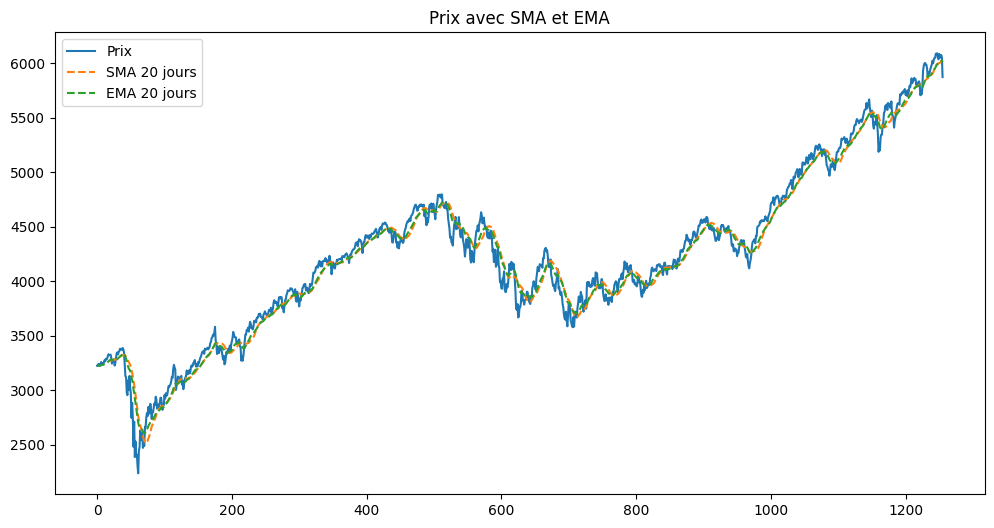

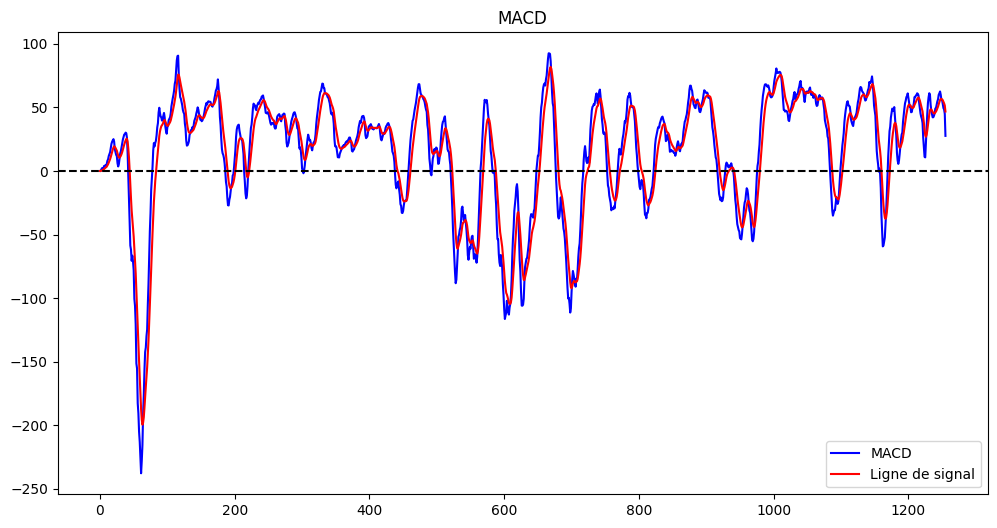

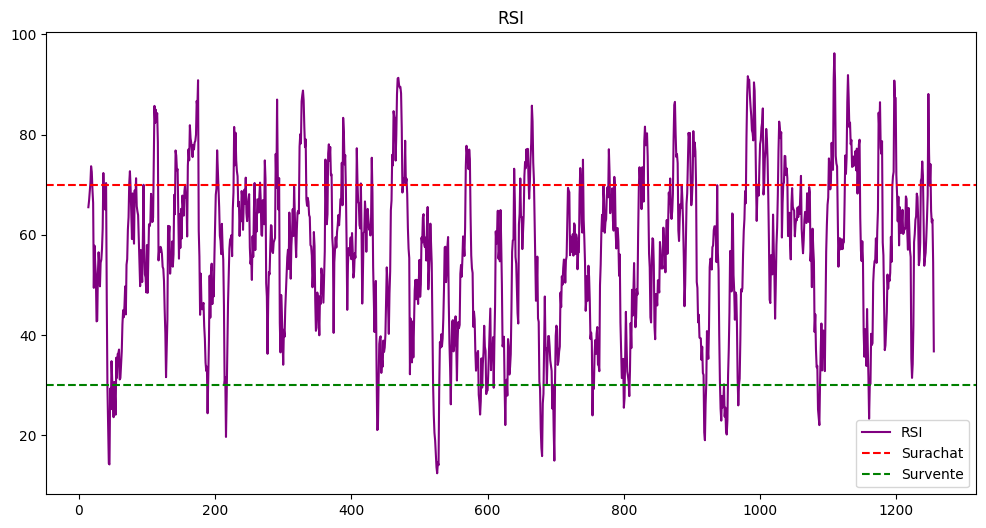

In [ ]:

# Tracer les prix avec SMA et EMA
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Adj Close_^GSPC'], label='Prix')
plt.plot(merged_data['SMA_20'], label='SMA 20 jours', linestyle='--')
plt.plot(merged_data['EMA_20'], label='EMA 20 jours', linestyle='--')
plt.title("Prix avec SMA et EMA")
plt.legend()
plt.show()

# Tracer le MACD
plt.figure(figsize=(12, 6))
plt.plot(merged_data['MACD'], label='MACD', color='blue')
plt.plot(merged_data['Signal Line'], label='Ligne de signal', color='red')
plt.axhline(0, color='black', linestyle='--')
plt.title("MACD")
plt.legend()
plt.show()

# Tracer le RSI
plt.figure(figsize=(12, 6))
plt.plot(merged_data['RSI'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Surachat')
plt.axhline(30, color='green', linestyle='--', label='Survente')
plt.title("RSI")
plt.legend()
plt.show()


Identification des variables clés avec des techniques de corrélation

Corrélation avec la variable cible :
Adj Close_^GSPC    1.000000
Close_^GSPC        1.000000
Low_^GSPC          0.999465
High_^GSPC         0.999337
Open_^GSPC         0.998757
EMA_12             0.995608
EMA_20             0.992495
EMA_26             0.990337
SMA_20             0.989039
PIB                0.848012
Date               0.842798
DATE_y             0.839896
DATE_x             0.830483
Inflation          0.771165
Signal Line        0.351172
MACD               0.337838
RSI                0.185080
RS                 0.171639
Change             0.049443
Log Returns        0.039082
Gain              -0.052926
Loss              -0.124960
Avg Gain          -0.199103
Avg Loss          -0.324726
Volume_^GSPC      -0.389958
Name: Adj Close_^GSPC, dtype: float64


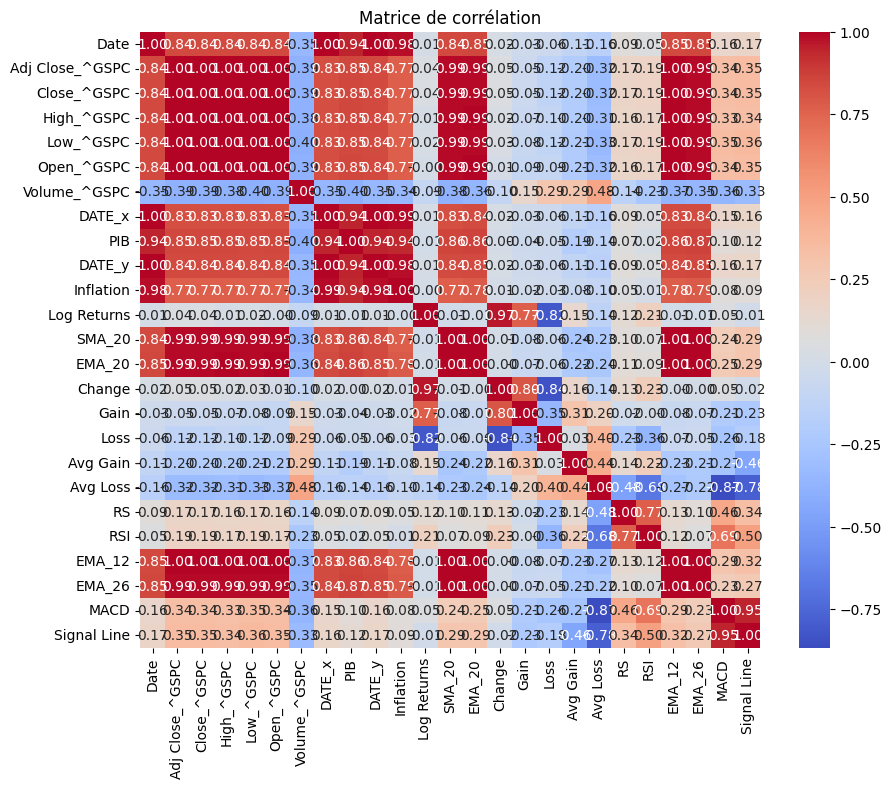

In [ ]:
import seaborn as sns

# Supposons que 'Adj Close' est la variable cible
target_variable = 'Adj Close_^GSPC'

# Calculez la matrice de corrélation
correlation_matrix = merged_data.corr()

# Extraire les corrélations avec la variable cible
target_corr = correlation_matrix[target_variable].sort_values(ascending=False)

# Affichez les corrélations
print("Corrélation avec la variable cible :")
print(target_corr)

# Visualisez la matrice de corrélation complète
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matrice de corrélation")
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer # Import SimpleImputer

# Préparation des données
X = merged_data.drop(columns=[target_variable, 'Date','DATE_x','DATE_y'])  # Variables explicatives, excluding 'Date', 'DATE'
y = merged_data[target_variable]                # Variable cible

# Identify non-numeric columns
non_numeric_cols = X.select_dtypes(exclude=['number']).columns

# Drop or convert non-numeric columns
# Option 1: Drop non-numeric columns
X = X.drop(columns=non_numeric_cols)

# Option 2: Convert non-numeric columns (e.g., using one-hot encoding for categorical features)
# X = pd.get_dummies(X, columns=non_numeric_cols)  # Example for categorical features

# Normalisation des features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Imputation of missing values # Add imputation step
imputer = SimpleImputer(strategy='mean') # Create an imputer object
X_scaled = imputer.fit_transform(X_scaled) # Impute missing values in X_scaled

# Entraînement du modèle
model = LinearRegression()
model.fit(X_scaled, y)

# Importance des coefficients
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.coef_
}).sort_values(by='Importance', ascending=False)

print(feature_importance)

         Feature    Importance
0    Close_^GSPC  7.589575e+02
11          Gain  4.495205e-12
9         EMA_20  1.927298e-12
17        EMA_12  1.992777e-13
13      Avg Gain  7.467311e-14
3     Open_^GSPC  6.448527e-14
14      Avg Loss  6.296290e-14
20   Signal Line  5.186048e-14
16           RSI  4.738041e-14
19          MACD  2.802730e-14
6      Inflation -1.657297e-14
5            PIB -3.157066e-14
1     High_^GSPC -7.691882e-14
7    Log Returns -8.704708e-14
4   Volume_^GSPC -9.418082e-14
15            RS -1.174063e-13
2      Low_^GSPC -2.424022e-13
8         SMA_20 -4.858396e-13
18        EMA_26 -2.016355e-12
12          Loss -4.929806e-12
10        Change -7.768844e-12


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Modèle de base
model = LinearRegression()

# RFE pour sélectionner les variables importantes
selector = RFE(estimator=model, n_features_to_select=5)
selector = selector.fit(X_scaled, y)

# Résultats
selected_features = X.columns[selector.support_]
print("Features sélectionnées :", selected_features)


Features sélectionnées : Index(['Close_^GSPC', 'Low_^GSPC', 'Change', 'Loss', 'EMA_12'], dtype='object')


In [ ]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.impute import SimpleImputer

# Create an imputer to fill NaN values
imputer = SimpleImputer(strategy='mean')  # You can use other strategies like 'median'

# Impute missing values in X
X_imputed = imputer.fit_transform(X)

# Now use the imputed data for mutual information calculation
mi = mutual_info_regression(X_imputed, y)

# Create a DataFrame with the scores
mi_scores = pd.DataFrame({
    'Feature': X.columns,  # Keep original column names
    'Mutual Information': mi
}).sort_values(by='Mutual Information', ascending=False)

print(mi_scores)

         Feature  Mutual Information
0    Close_^GSPC            5.878243
1     High_^GSPC            3.634122
2      Low_^GSPC            3.580619
3     Open_^GSPC            2.987435
17        EMA_12            2.524201
9         EMA_20            2.384988
18        EMA_26            2.310315
8         SMA_20            2.216444
6      Inflation            2.155832
5            PIB            1.712759
20   Signal Line            0.723625
19          MACD            0.593226
14      Avg Loss            0.504967
13      Avg Gain            0.435888
4   Volume_^GSPC            0.261052
15            RS            0.209728
16           RSI            0.190507
7    Log Returns            0.029833
11          Gain            0.019414
10        Change            0.004701
12          Loss            0.002632


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Entraînement d'un modèle Random Forest
rf = RandomForestRegressor()
rf.fit(X, y)

# Importance des features
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importance)


         Feature  Importance
0    Close_^GSPC    0.892645
2      Low_^GSPC    0.059082
1     High_^GSPC    0.024788
17        EMA_12    0.008042
3     Open_^GSPC    0.004811
9         EMA_20    0.004479
8         SMA_20    0.003784
18        EMA_26    0.002015
20   Signal Line    0.000220
19          MACD    0.000060
14      Avg Loss    0.000015
15            RS    0.000014
13      Avg Gain    0.000011
7    Log Returns    0.000008
16           RSI    0.000007
10        Change    0.000005
4   Volume_^GSPC    0.000005
11          Gain    0.000003
6      Inflation    0.000003
12          Loss    0.000003
5            PIB    0.000001


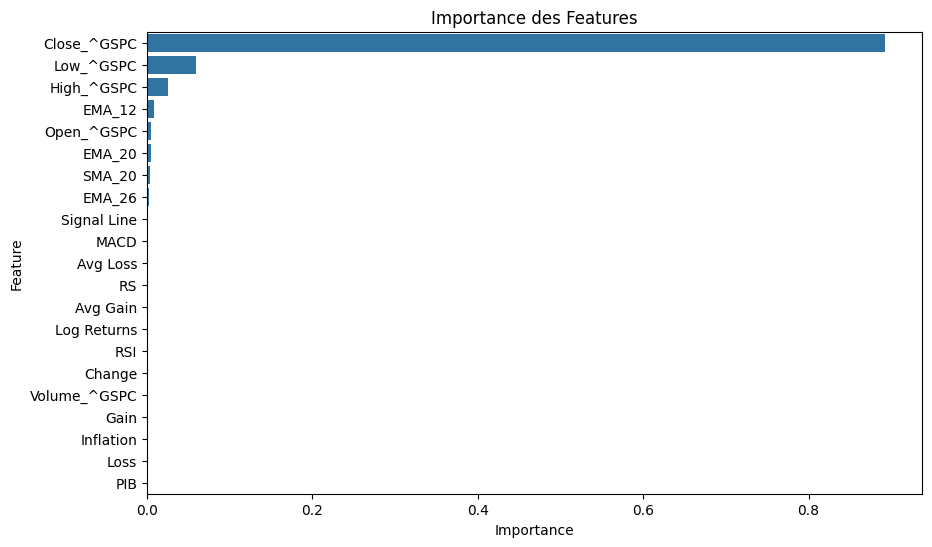

In [ ]:
# Visualisation des features importantes
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title("Importance des Features")
plt.show()


# Régression linéaire

In [ ]:
# à faire une regression linéaire + une random forest

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

# Supposons que 'Log Returns' est la target
# 1. Drop NA values from merged_data before assigning X and y
merged_data = merged_data.dropna()

y = merged_data['Log Returns']
# Exclude 'Date' and 'DATE' columns from X
X = merged_data.drop(columns=['Log Returns', 'Adj Close_^GSPC', 'Date', 'DATE_x', 'DATE_y'])

# Divisez en ensembles d'entraînement et de test
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation des features
scaler_linear = StandardScaler()
X_train_scaled_linear = scaler.fit_transform(X_train_linear)
X_test_scaled_linear = scaler.transform(X_test_linear)

# Modèle de régression linéaire
model = LinearRegression()
model.fit(X_train_scaled_linear, y_train_linear)

# Prédictions
y_pred_linear = model.predict(X_test_scaled_linear)

# Évaluation du modèle
print("R² :", r2_score(y_test_linear, y_pred_linear))
print("Erreur quadratique moyenne :", mean_squared_error(y_test_linear, y_pred_linear))

R² : 0.920794101731159
Erreur quadratique moyenne : 1.2519079149186081e-05


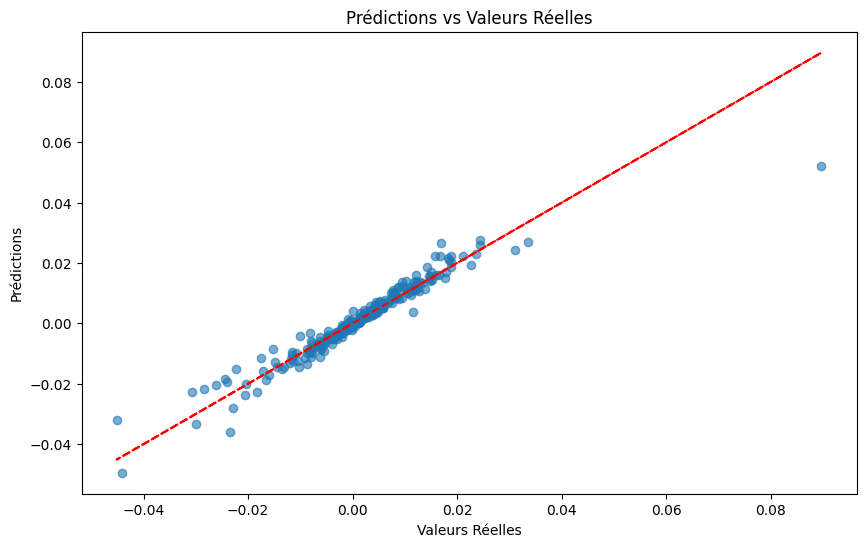

In [ ]:
import matplotlib.pyplot as plt

# Graphique des prédictions vs valeurs réelles
plt.figure(figsize=(10, 6))
plt.scatter(y_test_linear, y_pred_linear, alpha=0.6)
plt.plot(y_test_linear, y_test_linear, color='red', linestyle='--')
plt.xlabel("Valeurs Réelles")
plt.ylabel("Prédictions")
plt.title("Prédictions vs Valeurs Réelles")
plt.show()


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Ajout de termes quadratiques
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled_linear)
X_test_poly = poly.transform(X_test_scaled_linear)

# Régression linéaire avec les termes quadratiques
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train_linear)

# Évaluation
y_pred_poly = model_poly.predict(X_test_poly)
print("R² avec termes quadratiques :", r2_score(y_test_linear, y_pred_poly))


R² avec termes quadratiques : 0.9981202242786437


In [ ]:
# Coefficients du modèle
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print(coefficients)


         Feature  Coefficient
8         EMA_20     0.203308
3     Open_^GSPC     0.037266
18          MACD     0.010747
9         Change     0.006472
10          Gain     0.004526
1     High_^GSPC     0.001681
6      Inflation     0.000440
14            RS     0.000213
12      Avg Gain    -0.000041
4   Volume_^GSPC    -0.000115
13      Avg Loss    -0.000213
5            PIB    -0.000775
15           RSI    -0.001407
11          Loss    -0.006019
7         SMA_20    -0.006371
19   Signal Line    -0.007352
0    Close_^GSPC    -0.023931
2      Low_^GSPC    -0.030696
16        EMA_12    -0.089880
17        EMA_26    -0.092044


In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled_linear, y_train_linear)
print("R² (Ridge):", ridge.score(X_test_scaled_linear, y_test_linear))


R² (Ridge): 0.9223037719187818


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train_scaled_linear, y_train_linear, cv=5, scoring='r2')
print("R² moyen :", np.mean(scores))


R² moyen : 0.9435177409365287


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculer MAE
mae = mean_absolute_error(y_test_linear, y_pred_linear)

# Calculer RMSE
rmse = np.sqrt(mean_squared_error(y_test_linear, y_pred_linear))

# Définir une tolérance pour l'accuracy (ex. 5%)
tolerance = 0.05
accuracy = np.mean(np.abs((y_pred_linear - y_test_linear) / y_test_linear) <= tolerance) * 100

# Afficher les résultats
print(f"MAE (Mean Absolute Error) : {mae}")
print(f"RMSE (Root Mean Squared Error) : {rmse}")
print(f"Accuracy (avec tolérance de {tolerance*100}%) : {accuracy:.2f}%")


MAE (Mean Absolute Error) : 0.0018301145760526599
RMSE (Root Mean Squared Error) : 0.0035382310762846004
Accuracy (avec tolérance de 5.0%) : 12.10%


# Random Forest

In [ ]:
# Divisez les données
X = merged_data.drop(columns=['Log Returns', 'Adj Close_^GSPC']).dropna()  # Variables explicatives
y = merged_data['Log Returns'].dropna()  # Target

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraînez le modèle Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)  # n_estimators = nombre d'arbres
rf.fit(X_train_rf, y_train_rf)

# Faites les prédictions
y_pred_rf = rf.predict(X_test_rf)

# Évaluez les performances
mae = mean_absolute_error(y_test_rf, y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test_rf, y_pred_rf))
r2 = r2_score(y_test_rf, y_pred_rf)

print(f"MAE : {mae}")
print(f"RMSE : {rmse}")
print(f"R² : {r2}")


MAE : 0.0005821511844897724
RMSE : 0.0018732572823310235
R² : 0.977798618600561


         Feature  Importance
9         Change    0.413096
11          Loss    0.388490
10          Gain    0.146370
13      Avg Loss    0.009180
2      Low_^GSPC    0.005830
4   Volume_^GSPC    0.005506
0    Close_^GSPC    0.004398
3     Open_^GSPC    0.003829
1     High_^GSPC    0.003649
17        EMA_26    0.002901
16        EMA_12    0.002701
8         EMA_20    0.002590
19   Signal Line    0.002166
12      Avg Gain    0.002043
7         SMA_20    0.001948
18          MACD    0.001478
14            RS    0.001460
6      Inflation    0.001187
15           RSI    0.000622
5            PIB    0.000559


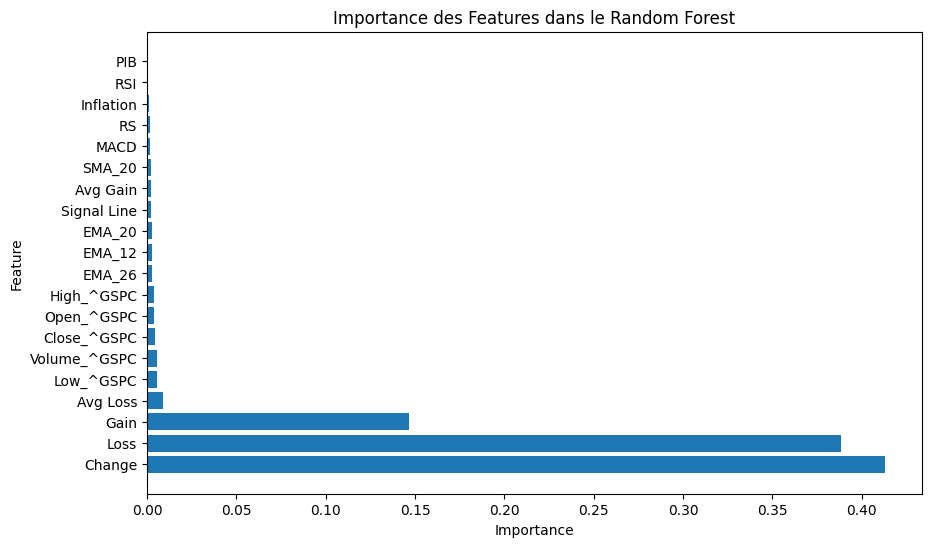

In [ ]:
# Extraire l'importance des features
feature_importances = rf.feature_importances_

# Créez un DataFrame pour afficher les résultats
import pandas as pd
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(feature_importances_df)

# Visualisez l'importance des features
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.title("Importance des Features dans le Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


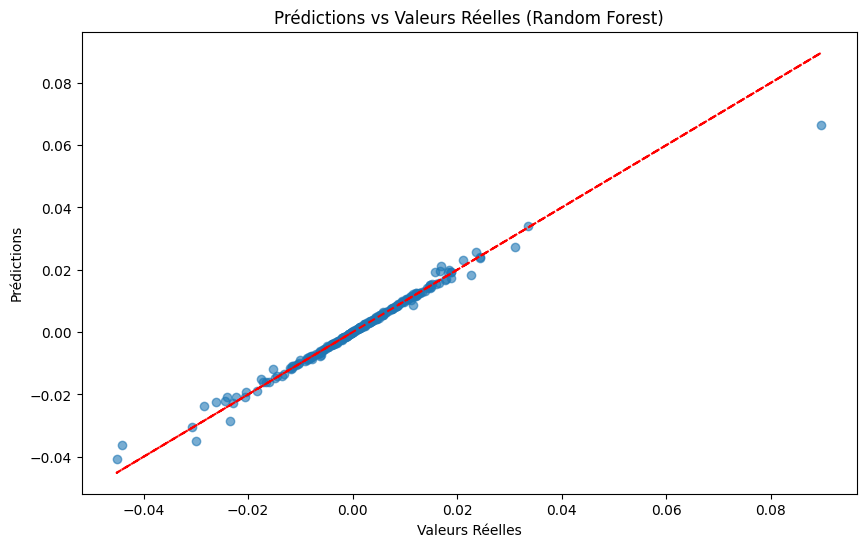

In [ ]:
import matplotlib.pyplot as plt

# Comparaison entre les vraies valeurs et les prédictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test_rf, y_pred_rf, alpha=0.6)
plt.plot(y_test_rf, y_test_rf, color='red', linestyle='--')
plt.xlabel("Valeurs Réelles")
plt.ylabel("Prédictions")
plt.title("Prédictions vs Valeurs Réelles (Random Forest)")
plt.show()


# Analyse des performances

In [ ]:
results = {"Modèle": ["Régression Linéaire", "Random Forest"],
    "MAE": [0.0018301145760526599, 0.0005821511844897724],
    "RMSE": [0.0018732572823310235, 0.0018732572823310235],
    "R²": [0.9223037719187818, 0.977798618600561]}


comparaison = pd.DataFrame(results)

comparaison


,Modèle,MAE,RMSE,R²
0,Régression Linéaire,0.001830,0.001873,0.922304
1,Random Forest,0.000582,0.001873,0.977799


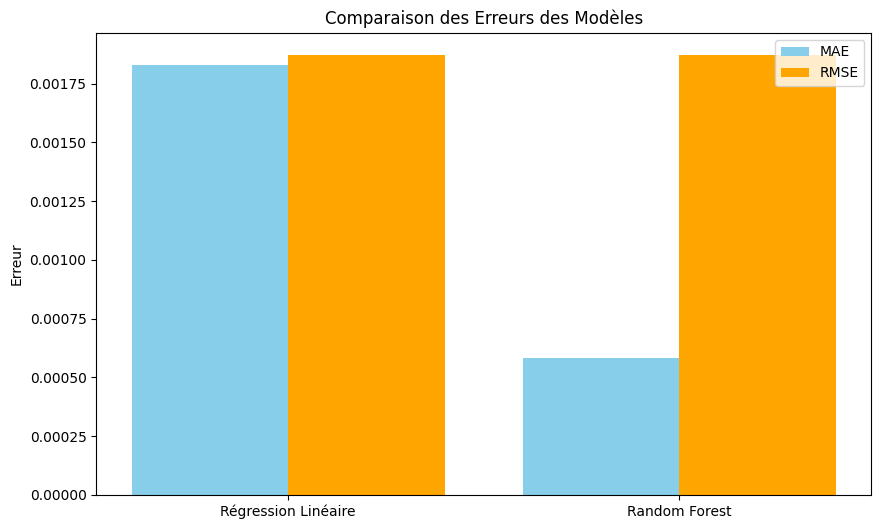

In [ ]:
import matplotlib.pyplot as plt

# Données pour les erreurs
models = ["Régression Linéaire", "Random Forest"]
mae = [0.0018301145760526599, 0.0005821511844897724]
rmse = [0.0018732572823310235, 0.0018732572823310235]

# Barplot pour MAE et RMSE
x = range(len(models))
width = 0.4  # Largeur des barres

plt.figure(figsize=(10, 6))

# Barres pour MAE
plt.bar(x, mae, width=width, label="MAE", color="skyblue", align='center')

# Barres pour RMSE
plt.bar([p + width for p in x], rmse, width=width, label="RMSE", color="orange", align='center')

# Paramètres du graphique
plt.xticks([p + width/2 for p in x], models)
plt.title("Comparaison des Erreurs des Modèles")
plt.ylabel("Erreur")
plt.legend()
plt.show()


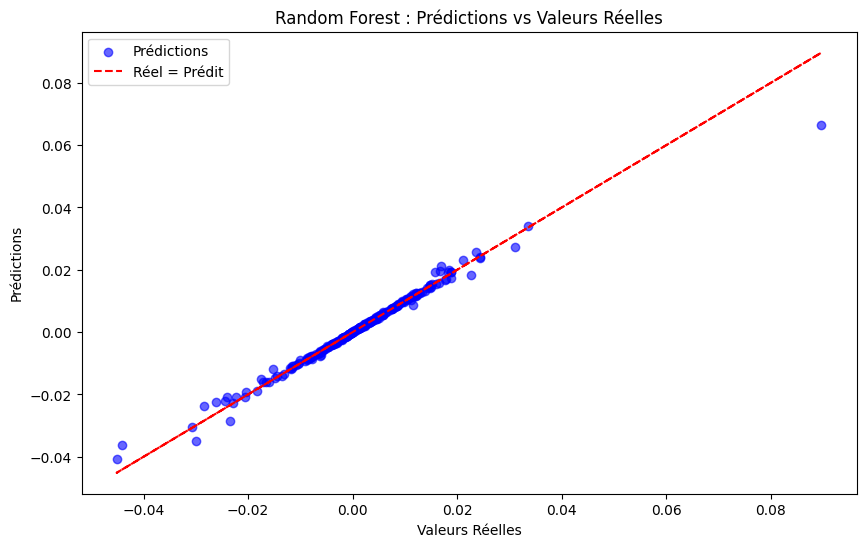

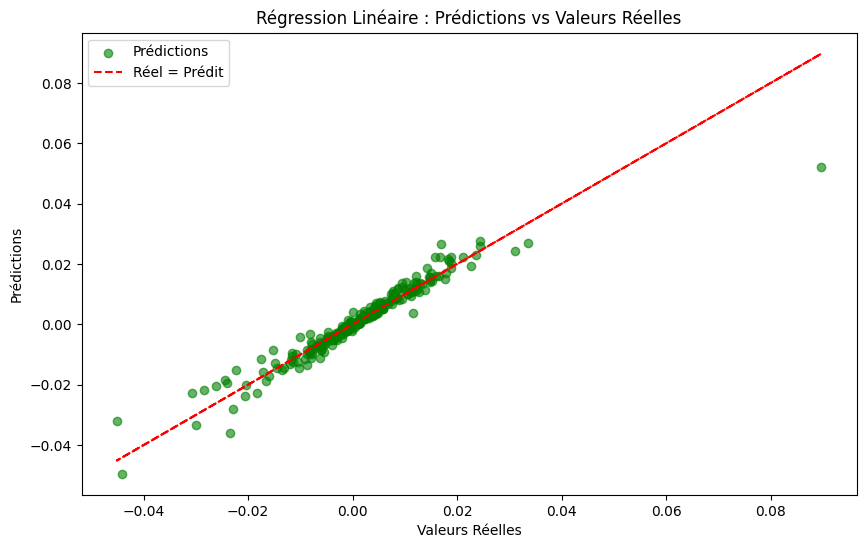

In [ ]:
# Exemple : Visualisation pour le Random Forest
plt.figure(figsize=(10, 6))

# Comparaison des valeurs réelles vs prédictions
plt.scatter(y_test_rf, y_pred_rf, alpha=0.6, color="blue", label="Prédictions")
plt.plot(y_test_rf, y_test_rf, color='red', linestyle='--', label="Réel = Prédit")

# Paramètres du graphique
plt.title("Random Forest : Prédictions vs Valeurs Réelles")
plt.xlabel("Valeurs Réelles")
plt.ylabel("Prédictions")
plt.legend()
plt.show()

# Répétez le même graphique pour la régression linéaire
plt.figure(figsize=(10, 6))
plt.scatter(y_test_linear, y_pred_linear, alpha=0.6, color="green", label="Prédictions")
plt.plot(y_test_linear, y_test_linear, color='red', linestyle='--', label="Réel = Prédit")
plt.title("Régression Linéaire : Prédictions vs Valeurs Réelles")
plt.xlabel("Valeurs Réelles")
plt.ylabel("Prédictions")
plt.legend()
plt.show()



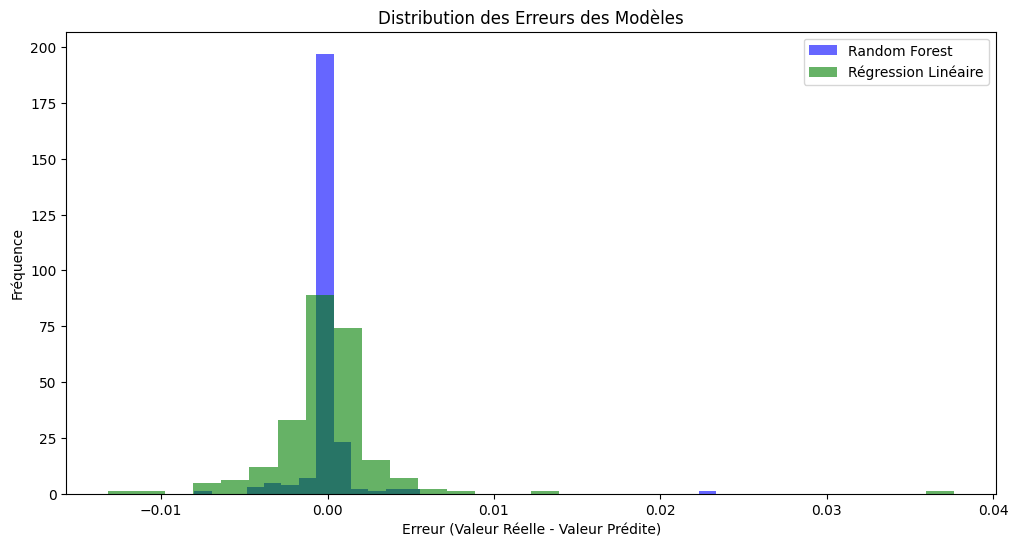

In [ ]:
# Calcul des erreurs pour chaque modèle
errors_rf = y_test_rf - y_pred_rf
errors_linear = y_test_linear - y_pred_linear

# Distribution des erreurs
plt.figure(figsize=(12, 6))
plt.hist(errors_rf, bins=30, alpha=0.6, label="Random Forest", color="blue")
plt.hist(errors_linear, bins=30, alpha=0.6, label="Régression Linéaire", color="green")
plt.title("Distribution des Erreurs des Modèles")
plt.xlabel("Erreur (Valeur Réelle - Valeur Prédite)")
plt.ylabel("Fréquence")
plt.legend()
plt.show()


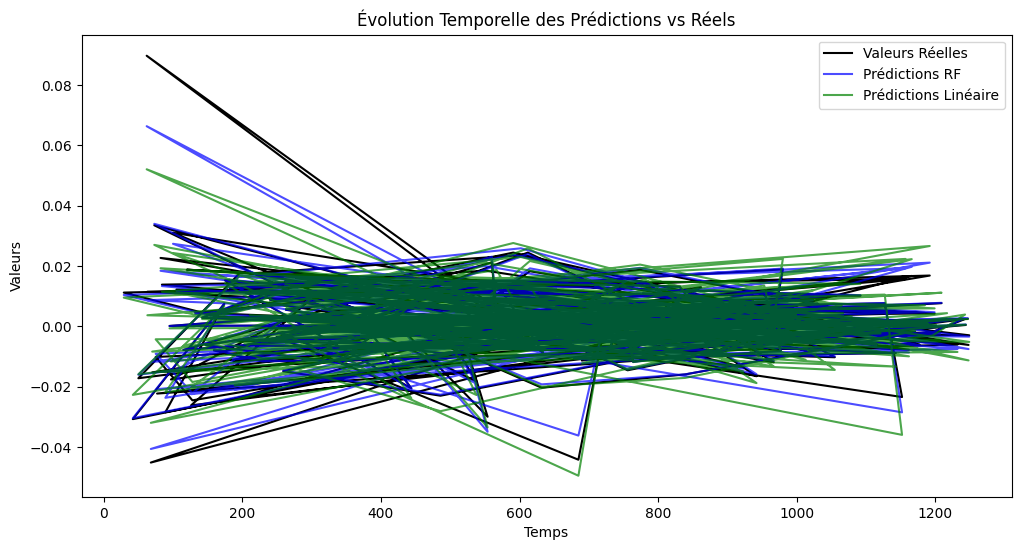

In [ ]:
# Tracé de l'évolution temporelle
plt.figure(figsize=(12, 6))
plt.plot(y_test_linear.index, y_test_linear, label="Valeurs Réelles", color="black")
plt.plot(y_test_rf.index, y_pred_rf, label="Prédictions RF", color="blue", alpha=0.7)
plt.plot(y_test_linear.index, y_pred_linear, label="Prédictions Linéaire", color="green", alpha=0.7)
plt.title("Évolution Temporelle des Prédictions vs Réels")
plt.xlabel("Temps")
plt.ylabel("Valeurs")
plt.legend()
plt.show()


# Discussion erreurs courantes

Identification des sources potentielles d'erreur :

Surajustement (Overfitting)

Le modèle Random Forest peut surajuster si le nombre d’arbres ou la profondeur des arbres est trop élevé. Cela se produit lorsque le modèle s'adapte trop aux variations du jeu d’entraînement et perd en généralisation.

Très bonne performance sur le jeu d'entraînement mais dégradation significative sur le jeu de test.

Valeurs de R² ou MAE/RMSE beaucoup meilleures sur l'entraînement que sur le test.



Solutions :
Limiter la profondeur des arbres ou réduire le nombre d’arbres.

Utiliser une validation croisée pour évaluer la robustesse du modèle.

Ajouter un mécanisme de régularisation (par exemple, réduire les variables inutiles).





Multicolinéarité

En régression linéaire, une forte corrélation entre les variables explicatives (features) peut affecter les coefficients estimés, rendant le modèle instable. Cela peut aussi compliquer l’interprétation.

Coefficients très élevés ou incohérents dans le modèle de régression.
Test de la Variance Inflation Factor (VIF) supérieur à 5 pour certaines variables.

Solutions :
Éliminer les variables fortement corrélées.
Appliquer des techniques de réduction de dimension comme PCA (analyse en composantes principales).

Endogénéité

Elle se produit lorsque les variables explicatives sont corrélées à l’erreur résiduelle. Par exemple, certaines variables pourraient influencer ou être influencées par la variable cible (retour sur l'indice S&P500).

Coefficients biaisés ou incohérents en régression linéaire.

Solutions :
Identifier et utiliser des instruments valides (variables instrumentales).

Appliquer des modèles robustes aux problèmes d’endogénéité (comme le modèle 2SLS - Two-Stage Least Squares).

Autres sources d'erreur possibles :

Données bruitées ou imprécises :
Les données historiques financières (S&P500, PIB, CPI) peuvent contenir des anomalies (valeurs manquantes, erreurs d’enregistrement).

Solution : Nettoyer les données en détectant et corrigeant les anomalies.
Données non stationnaires :

Les séries temporelles non stationnaires peuvent induire des biais dans la régression et les modèles non linéaires.

Solution : Tester la stationnarité (ex. : test ADF) et différencier les séries si nécessaire.

Modèle non adapté :
La régression linéaire peut échouer si la relation entre les variables explicatives et la cible est non linéaire.

Solution : Tester des modèles plus flexibles (SVM, Gradient Boosting, etc.).


In [ ]:
from sklearn.model_selection import GridSearchCV

# Définir les paramètres à tester
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Recherche sur grille
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid,
                           cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_rf, y_train_rf)

# Meilleurs paramètres
print("Meilleurs paramètres :", grid_search.best_params_)

# Modèle optimisé
best_rf = grid_search.best_estimator_


Meilleurs paramètres : {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(RandomForestRegressor(), X, y, cv=5, scoring='neg_mean_absolute_error')
print("MAE moyen avec validation croisée :", -scores.mean())


MAE moyen avec validation croisée : 0.0013163492984986098
